**Importing data from the Internet**

The web is a rich source of data from which you can extract various types of insights and findings. In this chapter, you will learn how to get data from the web, whether it be stored in files or in HTML. You'll also learn the basics of scraping and parsing web data.

**Importing flat files from the web: your turn!**

You are about to import your first file from the web! The flat file you will import will be `'winequality-red.csv'` from the University of California, Irvine's [Machine Learning repository](http://archive.ics.uci.edu/ml/index.html). The flat file contains tabular data of physiochemical properties of red wine, such as pH, alcohol content and citric acid content, along with wine quality rating.

The URL of the file is
```
'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
```
After you import it, you'll check your working directory to confirm that it is there and then you'll load it into a `pandas` DataFrame.

In [1]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file: url
url='https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url,'winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

**Opening and reading flat files from the web**

You have just imported a file from the web, saved it locally and loaded it into a DataFrame. If you just wanted to load a file from the web into a DataFrame without first saving it locally, you can do that easily using `pandas`. In particular, you can use the function `pd.read_csv()` with the URL as the first argument and the separator `sep` as the second argument.

The URL of the file, once again, is

'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

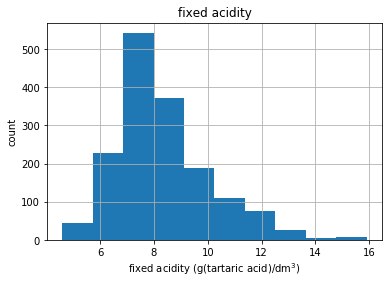

In [2]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file: url
url='https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df=pd.read_csv(url,sep=';')

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
pd.DataFrame.hist(df.ix[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()


**Importing non-flat files from the web**

Congrats! You've just loaded a flat file from the web into a DataFrame without first saving it locally using the `pandas` function `pd.read_csv()`. This function is super cool because it has close relatives that allow you to load all types of files, not only flat ones. In this interactive exercise, you'll use `pd.read_excel()` to import an Excel spreadsheet.

The URL of the spreadsheet is
```
'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'
```
Your job is to use `pd.read_excel()` to read in all of its sheets, print the sheet names and then print the head of the first sheet using its name, not its index.

Note that the output of `pd.read_excel()` is a Python dictionary with sheet names as keys and corresponding DataFrames as corresponding values.

In [3]:
# Import package
import pandas as pd

# Assign url of file: url
url='http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xl
xl=pd.read_excel(url,sheetname=None)

# Print the sheetnames to the shell
print(xl.keys())

# Print the head of the first sheet (using its name, NOT its index)
print(xl['1700'].head())


dict_keys(['1900', '1700'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


**Performing HTTP requests in Python using urllib**

Now that you know the basics behind HTTP GET requests, it's time to perform some of your own. In this interactive exercise, you will ping our very own DataCamp servers to perform a GET request to extract information from our teach page, `"http://www.datacamp.com/teach/documentation"`.

In the next exercise, you'll extract the HTML itself. Right now, however, you are going to package and send the request and then catch the response.

In [4]:
# Import packages
from urllib.request import urlopen,Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request: request
request=Request(url)

# Sends the request and catches the response: response
response=urlopen(request)

# Print the datatype of response
print(type(response))

# Be polite and close the response!
response.close()


<class 'http.client.HTTPResponse'>


**Printing HTTP request results in Python using urllib**

You have just packaged and sent a GET request to `"http://www.datacamp.com/teach/documentation"` and then caught the response. You saw that such a response is a `http.client.HTTPResponse` object. The question remains: what can you do with this response?

Well, as it came from an HTML page, you could read it to extract the HTML and, in fact, such a `http.client.HTTPResponse` object has an associated `read()` method. In this exercise, you'll build on your previous great work to extract the response and print the HTML.

In [5]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response=urlopen(request)

# Extract the response: html
html=response.read()

# Print the html
print(html)

# Be polite and close the response!
response.close()


b'\n<!DOCTYPE HTML>\n<html lang="" >\n    <head>\n        <meta charset="UTF-8">\n        <meta content="text/html; charset=utf-8" http-equiv="Content-Type">\n        <title>Welcome \xc2\xb7 Authoring Content for DataCamp</title>\n        <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n        <meta name="description" content="">\n        <meta name="generator" content="GitBook 3.2.3">\n        \n        \n        \n    \n    <link rel="stylesheet" href="gitbook/style.css">\n\n    \n            \n                \n                <link rel="stylesheet" href="gitbook/gitbook-plugin-bootstrap-callout/plugin.css">\n                \n            \n                \n                <link rel="stylesheet" href="gitbook/gitbook-plugin-expandable-chapters/expandable-chapters.css">\n                \n            \n                \n                <link rel="stylesheet" href="gitbook/gitbook-plugin-advanced-emoji/emoji-website.css">\n                \n            \n                \n  

**Performing HTTP requests in Python using requests**

Now that you've got your head and hands around making HTTP requests using the urllib package, you're going to figure out how to do the same using the higher-level requests library. You'll once again be pinging DataCamp servers for their `"http://www.datacamp.com/teach/documentation"` page.

Note that unlike in the previous exercises using urllib, you don't have to close the connection when using requests!

In [6]:
# Import package
import requests

# Specify the url: url
url='http://www.datacamp.com/teach/documentation'

# Packages the request, send the request and catch the response: r
r=requests.get(url)

# Extract the response: text
text=r.text

# Print the html
print(text)



<!DOCTYPE HTML>
<html lang="" >
    <head>
        <meta charset="UTF-8">
        <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
        <title>Welcome · Authoring Content for DataCamp</title>
        <meta http-equiv="X-UA-Compatible" content="IE=edge" />
        <meta name="description" content="">
        <meta name="generator" content="GitBook 3.2.3">
        
        
        
    
    <link rel="stylesheet" href="gitbook/style.css">

    
            
                
                <link rel="stylesheet" href="gitbook/gitbook-plugin-bootstrap-callout/plugin.css">
                
            
                
                <link rel="stylesheet" href="gitbook/gitbook-plugin-expandable-chapters/expandable-chapters.css">
                
            
                
                <link rel="stylesheet" href="gitbook/gitbook-plugin-advanced-emoji/emoji-website.css">
                
            
                
                <link rel="stylesheet" hre

**Parsing HTML with BeautifulSoup**

In this interactive exercise, you'll learn how to use the BeautifulSoup package to parse, prettify and extract information from HTML. You'll scrape the data from the webpage of Guido van Rossum, Python's very own [Benevolent Dictator for Life](https://en.wikipedia.org/wiki/Benevolent_dictator_for_life). In the following exercises, you'll prettify the HTML and then extract the text and the hyperlinks.

The URL of interest is `url = 'https://www.python.org/~guido/'`.

In [9]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url='https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r=requests.get(url)

# Extracts the response as html: html_doc
html_doc=r.text

# Create a BeautifulSoup object from the HTML: soup
soup=BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup=soup.prettify()

# Print the response
print(pretty_soup)


<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg">
    Who
I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a href="Publications.html">
    publications list
   </a>
   , a
   <a href="bio.html">
    brief bio
   </a>
   , assor

C:\Anaconda3\envs\python36-with-r\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\envs\python36-with-r\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


**Turning a webpage into data using BeautifulSoup: getting the text**

As promised, in the following exercises, you'll learn the basics of extracting information from HTML soup. In this exercise, you'll figure out how to extract the text from the BDFL's webpage, along with printing the webpage's title.

In [10]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup=BeautifulSoup(html_doc)

# Get the title of Guido's webpage: guido_title
guido_title=soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text=soup.get_text()

# Print Guido's text to the shell
print(guido_text)


<title>Guido's Personal Home Page</title>

Guido's Personal Home Page






Guido van Rossum - Personal Home Page

"Gawky and proud of it."


Who
I Am

Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.  I
also have
a G+
profile.

In January 2013 I joined
Dropbox.  I work on various Dropbox
products and have 50% for my Python work, no strings attached.
Previously, I have worked for Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me

You can send email for me to guido (at) python.org.
I read everything sent there, but if you ask
me a question about using Python, it's likely that I won't have time
to answer it, and will inste

C:\Anaconda3\envs\python36-with-r\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\envs\python36-with-r\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


**Turning a webpage into data using BeautifulSoup: getting the hyperlinks**

In this exercise, you'll figure out how to extract the URLs of the hyperlinks from the BDFL's webpage. In the process, you'll become close friends with the soup method `find_all()`.

In [11]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Print the title of Guido's webpage
print(soup.title)

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags=soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))


<title>Guido's Personal Home Page</title>
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
https://plus.google.com/u/0/115212051037621986145/posts
http://www.dropbox.com
Resume.html
http://groups.google.com/groups?q=comp.lang.python
http://stackoverflow.com
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


C:\Anaconda3\envs\python36-with-r\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\envs\python36-with-r\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))
